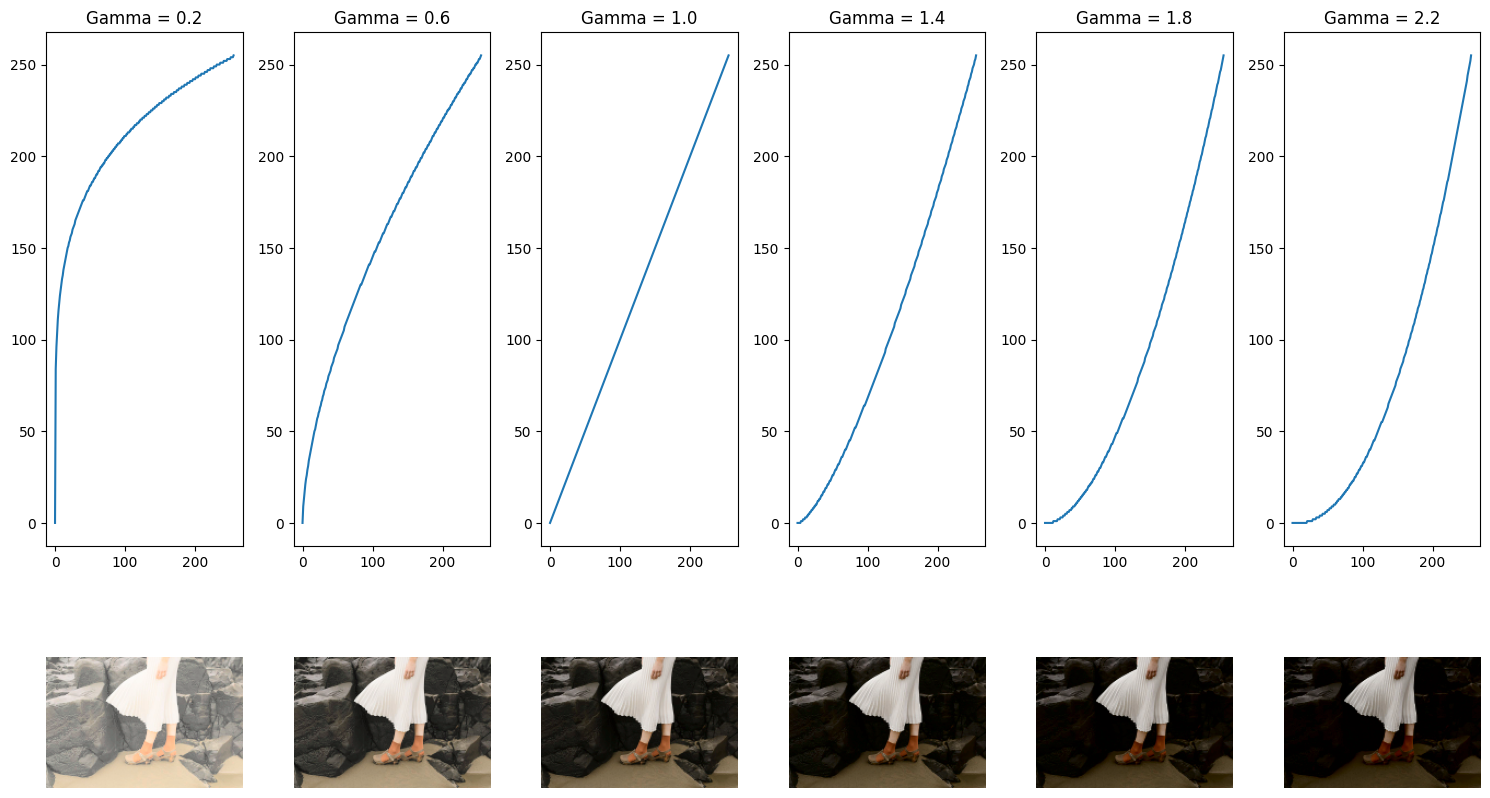

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert to RGB
img = cv.imread(r"a1images/a1images/highlights_and_shadows.jpg" , cv.COLOR_BGR2Lab)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
assert img is not None, "file could not be read, check with os.path.exists()"

# Convert image to Lab color space
img_converted = cv.cvtColor(img, cv.COLOR_RGB2Lab)

# Split the Lab image into L*, a*, and b* channels
L, a, b = cv.split(img_converted)

# Define gamma values
gamma_values = np.array([0.2, 0.6, 1, 1.4, 1.8, 2.2])

# Prepare subplots
fig, ax = plt.subplots(2, 6, figsize=(15, 10))

for i, gamma in enumerate(gamma_values):
    # Create gamma correction lookup table
    t = np.array([(p / 255) ** gamma * 255 for p in range(256)]).astype(np.uint8)
    L_gamma = cv.LUT(L, t)
    img_gamma_lab = cv.merge([L_gamma, a, b])   
    img_gamma_rgb = cv.cvtColor(img_gamma_lab, cv.COLOR_Lab2RGB)

    # Plot the gamma curve
    ax[0, i].plot(t)
    ax[0, i].set_title(f"Gamma = {gamma}")

    # Display the gamma-corrected image
    ax[1, i].imshow(img_gamma_rgb)
    ax[1, i].axis('off')

# Show the plots
plt.tight_layout()
plt.show()



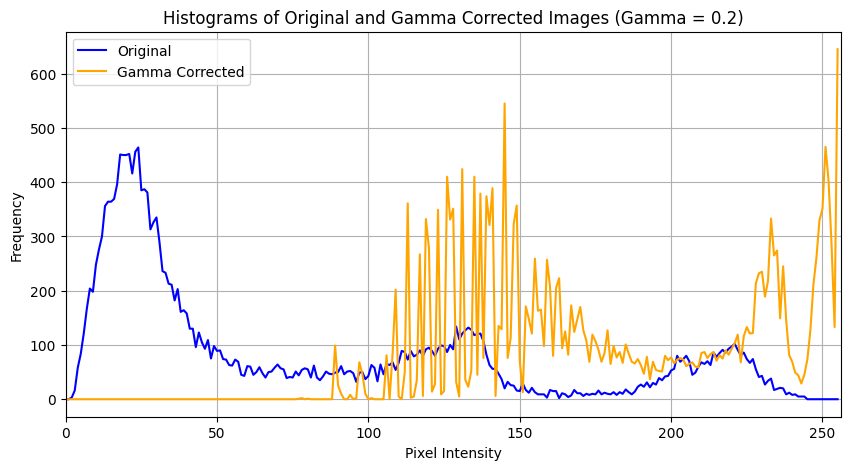

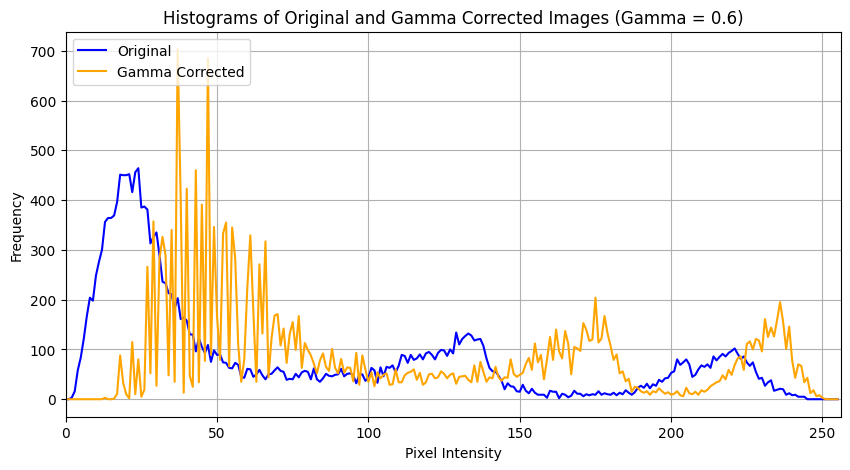

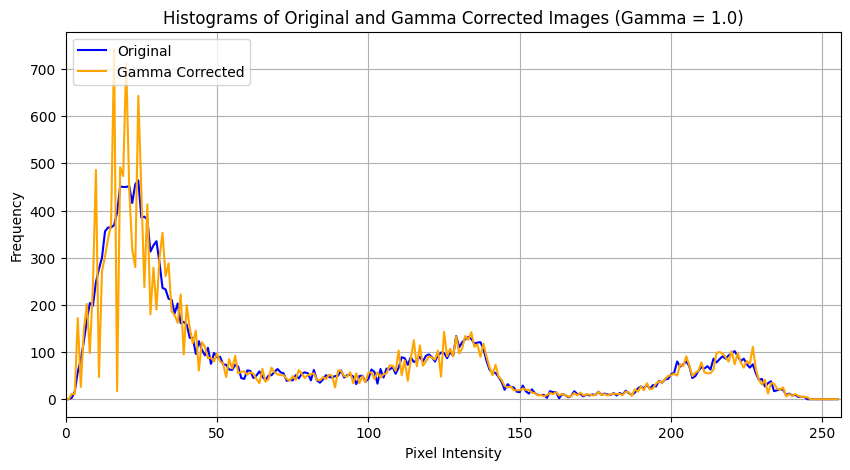

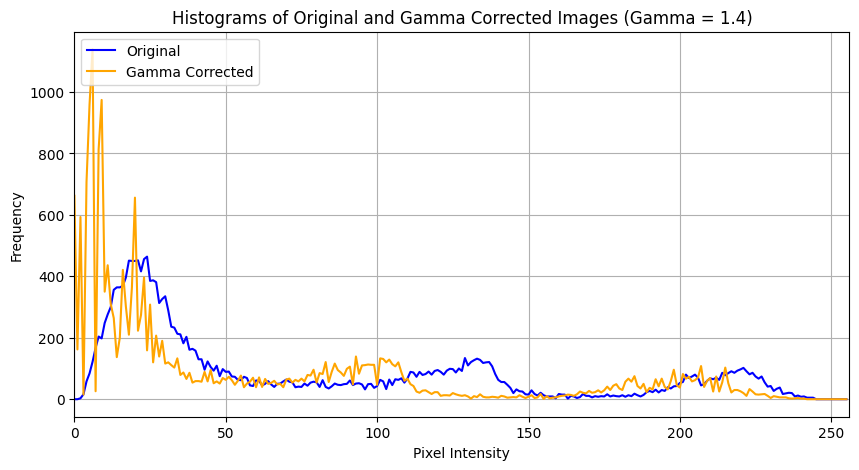

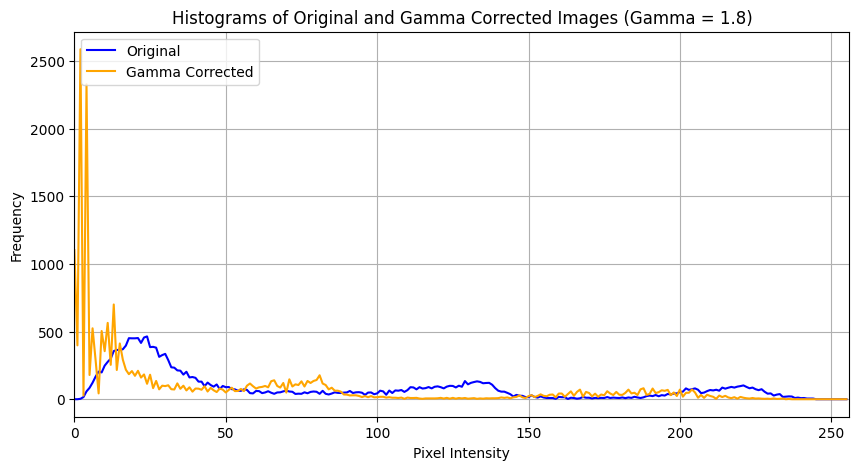

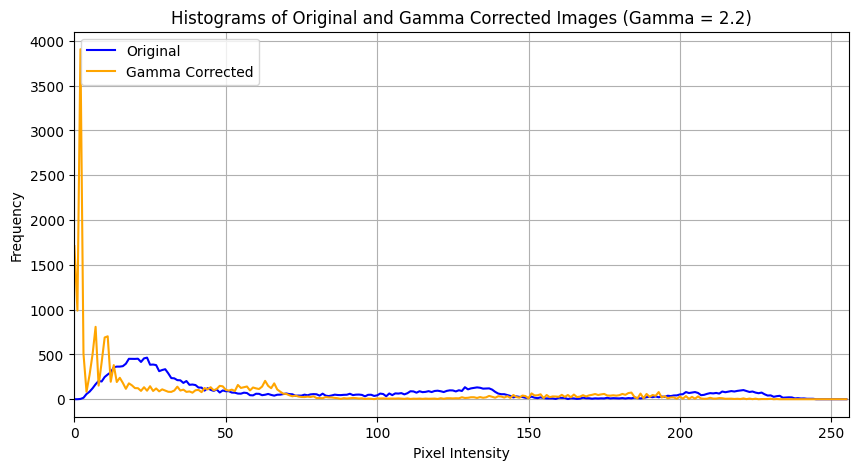

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert to RGB
img = cv.imread(r"a1images/a1images/highlights_and_shadows.jpg" , cv.COLOR_BGR2Lab)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
assert img is not None, "file could not be read, check with os.path.exists()"

# Convert image to Lab color space
img_converted = cv.cvtColor(img, cv.COLOR_RGB2Lab)
hist = cv.calcHist([img], [0], None, [256], [0, 256])

# Split the Lab image into L*, a*, and b* channels
L, a, b = cv.split(img_converted)

# Define gamma values
gamma_values = np.array([0.2, 0.6, 1, 1.4, 1.8, 2.2])


for i, gamma in enumerate(gamma_values):
    # Create gamma correction lookup table
    t = np.array([(p / 255) ** gamma * 255 for p in range(256)]).astype(np.uint8)
    L_gamma = cv.LUT(L, t)
    img_gamma_lab = cv.merge([L_gamma, a, b])   
    img_gamma_rgb = cv.cvtColor(img_gamma_lab, cv.COLOR_Lab2RGB)
    hist_gamma = cv.calcHist([img_gamma_rgb], [0], None, [256], [0, 256])


    
    # Plot histograms
    plt.figure(figsize=(10, 5))
    plt.plot(hist, label='Original', color='blue')
    plt.plot(hist_gamma, label='Gamma Corrected', color='orange')
    plt.xlim([0, 256])
    plt.title('Histograms of Original and Gamma Corrected Images' + f' (Gamma = {gamma})')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    plt.grid(True)
    


# Show the plots
plt.show()